# pyVoltic - Model Run

pyVoltic can be used to run a vareity of Edge Based Compartmental Models (EBCM), it is also intended to be used as a framework for developing EBCMs. 

This notebook will go over running one of the models with a poisson probability generating function.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

In [3]:
sys.path.append('../')

In [4]:
# loading models
from pyvoltic.models import SIRSR, SIRNE, EBCM, MFSHEBCM

In [5]:
import pyvoltic.probability_generating_functions as pgf

The way the VolzFramework, the parent class, is structured is that a model will need the probability generating function, and its first and second derivative as well as a potential probability lambda - the probability lambda is defined as anything which the probability generating function needs for its desired distribution. 

For instance the poisson probability generating function needs a $\mu$ value, whereas the powerlaw probability generating function will need a vector.

If you want to learn more about the application of probability generating functions, JC Miller wrote a primer on probability generating functions. This will give an overview as well as exercises for you to work through.

In [6]:
# instantiate the model with the poisson proability generating functions
sir_sr = SIRSR(pgf.poisson_calc_g, 
      pgf.poisson_calc_g1,
      pgf.poisson_calc_g2,
      probability_lambda= 2) 

When you want to run a simulation you will use the `run_simulation` method from the class object. This method takes the attack rate, the recovery rate, epsilon which is the fraction of infected and the desired length of the simulation. 

Some models require more parameters such as the SIRNE model requires a rho a mixing parameters. 

In [7]:
sir_sr_rez = sir_sr.run_simulation(r = 1, mu = 0.05,
                                   epsilon = 0.0001, timesteps=100)

`run_simulation` returns a results object, each simulation likely has its own results object as the output numpy matrix may have compartments in different orders.

This results object allows the user to plot a variety of results with ease, such as:
- Susceptible - Infected - Recovered Graph
- Every Compartment
- Cumulative Incidence

The class has been designed to allow for easier extension if desired.

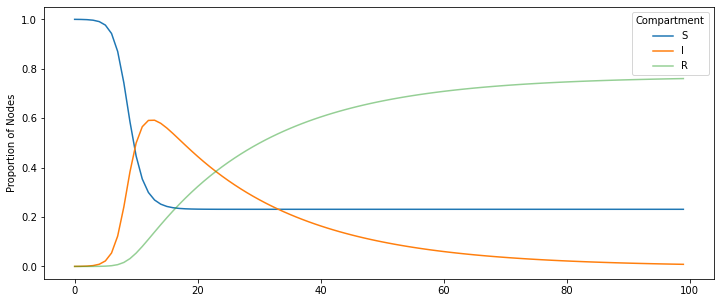

In [8]:
sir_sr_rez.SIR_graph()

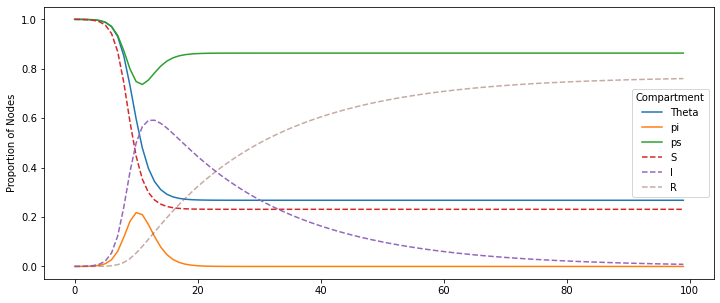

In [9]:
sir_sr_rez.full_simulation()

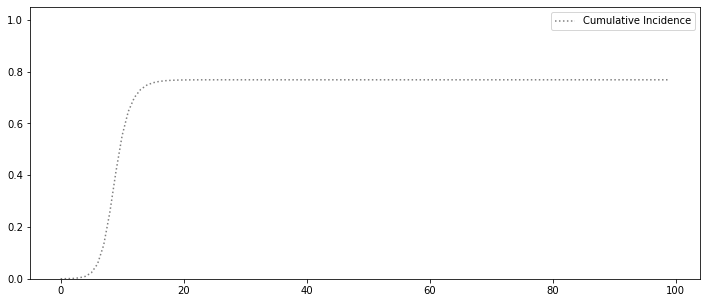

In [10]:
sir_sr_rez.cumulative_incidence()